# Práctica Guiada de Laboratorio 5: Implementación del juego inteligente *Michi en Python* - Parte 3

## Curso "Inteligencia Artificial" Semestre 2022-1 - Grupo 1 - EAPIS

### Prof. Rolando A. Maguiña Pérez
### Junio 2022

## Introducción

En esta tercera parte, se presenta la implementación de la estrategia de búsqueda denominada Primero el Mejor que determinará las jugadas de la máquina. Con esa finalidad, se usará como base el programa  construido en la segunda parte y se insertarán en el código respectivo las funciones adecuadas que implementen la estrategia mencionada. Asimismo, el programa indicará la estrategia usada para efectuar dichos movimientos. 

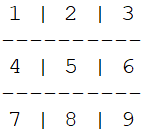

In [1]:
from IPython.display import Image
i = Image(filename='D:\\Cursos\\IA\\Python\\2021-1\\tablero_con_nros1.png')
i

## Estrategia Primero el Mejor

## Implementación de la estrategia Primero el Mejor

La implementación de esta estrategia de búsqueda para las jugadas de la máquina, requiere básicamente de tres pasos:
- Generar los sucesores de un nodo.
- Definir una función de evaluación ad hoc y aplicarla a los sucesores de dicho nodo.
- Seleccionar el sucesor con mejor valor de evaluación.

### Generación de sucesores

Definiremos una función para la generación de los sucesores que llamaremos `genmov(.)`. Antes,  debemos modificar la denominada `efectuar_movimiento(.)`; en la nueva versión de esta función, se crea previamente una copia del tablero, luego se efectúa el movimiento (coloca en la posición *pos* un aspa 'X' si es el jugador computadora o un círculo 'O' si es el jugador oponente). 

La nueva versión es:

#### Función *efectuar_movimiento(.)*

In [1]:
def efectuar_movimiento(jugador, pos, tablero):
    tablero=tablero.copy()
    pos=pos
    tablero[pos-1]=jugador
    return tablero

Para comprobar el comportamiento de la función así definida,  luego de interpretarla la llamamos para marcar un aspa en la posición 3 del tablero:

In [2]:
efectuar_movimiento(10, 3, [0,0,0,0,0,0,0,0,0])

[0, 0, 10, 0, 0, 0, 0, 0, 0]

#### Función *genmov(.)*

La función `genmov(.)` toma un tablero y un jugador, y genera sus sucesores. Lo hace llamando a `efectuar_movimiento()`; antes verifica si la posición del movimiento corresponde a un casillero vacío, si corresponde, se efectúa el movimiento.

In [3]:
def genmov(tablero, jugador):
    lista=[]
    for i in range(0,9):
        if (tablero[i-1]==0):
            sucesor=efectuar_movimiento(jugador,i,tablero)
            lista.append(sucesor)
        else:
            tablero[i-1]=tablero[i-1]
    return lista    

Verificando la función con un tablero sin jugada alguna, para el jugador humano.

In [4]:
genmov([0,0,0,0,0,0,0,0,0],1)

[[0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0]]

Verificando ahora la función con un tablero en el que se han realizado varias jugadas, para el jugador humano: 

In [5]:
genmov([0,1,0,10,0,10,10,1,0],1)

[[0, 1, 0, 10, 0, 10, 10, 1, 1],
 [1, 1, 0, 10, 0, 10, 10, 1, 0],
 [0, 1, 1, 10, 0, 10, 10, 1, 0],
 [0, 1, 0, 10, 1, 10, 10, 1, 0]]

Se observa que al llamársela con un tablero con varias jugadas realizadas y jugando el humano, la función generó los sucesores posibles: posiciones 1, 3, 5 y 9.

### Función de evaluación

Se usará la FUNCIÓN DE EVALUACIÓN ESTATICA que  plantean Nilsson/Norvig en su libro  y que se presentó en clase de teoría:

- Si *p* no es una posición ganadora para ningún jugador:

       f(p) = (Nº filas, columnas y diagonales completas aun libres para MAX) - (Nº filas, columnas y diagonales completas aun libres para MIN)
- Si *p* es una posición ganadora para MAX:

       f(p) = +inf (donde +inf indica un número positivo muy grande)
- Si *p* es una posición ganadora para MAX:

       f(p) = -inf (donde -inf indica un número negativo muy grande)


#### Función *feval(.)*

Se implementará mediante la función `feval(.)`. Esta, a su vez,  se vale de las funciones `ganador_pc(.)` y `ganador_oponente(.)`, que calculan f(p) cuando *p*  corresponde a una posición ganadora de uno de los jugadores. Usa también la función denominada *lineas-abiertas(.)* que calcula f(p) mediante la diferencia entre líneas abiertas para MAX menos líneas abiertas para MIN.

In [6]:
# Fc de evaluacion; 
def feval(tablero):
    if(ganador_pc(tablero)==True):
        res = 10000
        return res
    elif(ganador_oponente(tablero)==True):
        res = -10000
        return res
    else:
        return lineas_abiertas(tablero)

Debemos definir ahora las funciones `ganador_pc(.)`, `ganador_oponente(.)` y `lineas_abiertas(.)`, para poder usar `feval(.)`.

#### Función *ganador_pc(.)*

In [7]:
def ganador_pc(tablero):
    sumas = calcula_sumas(tablero) 
    if 30 in sumas:
        return True
    else:
        return False

Llamamos a la función para comprobar su funcionamiento; previamente, recordamos las definiciones de las funciones `suma_tripleta(.)` y `calcula_sumas(.)`, y las interpretamos:

In [8]:
tripletas = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 4, 7], [2, 5, 8], [3, 6, 9], [1, 5, 9], [3, 5, 7]]

def suma_tripleta(tablero, tripleta):
    a, b, c = tripleta[0]-1, tripleta[1]-1, tripleta[2]-1
    return tablero[a] + tablero[b] + tablero[c]

def calcula_sumas(tablero):
    sumas = []
    for x in tripletas:
        z = suma_tripleta(tablero, x)
        sumas.append(z)
    return sumas 

In [9]:
ganador_pc([10,10,10,1,0,0,1,0,1])

True

In [10]:
ganador_pc([1,1,10,10,0,0,10,0,1])

False

#### Función *ganador_oponente()*

In [11]:
def ganador_oponente(tablero):
    sumas = calcula_sumas(tablero) 
    if 3 in sumas:
        return True
    else:
        return False

Llamamos a la función para comprobar su funcionamiento:

In [12]:
ganador_oponente([10,10,10,1,0,0,1,0,1])

False

In [13]:
ganador_oponente([1,1,1,10,0,0,10,0,10])

True

#### Función *lineas_abiertas(.)*

Para las posiciones que no corresponden a la victoria de uno de los jugadores, hace lo sgte:
- Para cada elemento de *sumas*  
    - La condicional IF verifica los valores de c/u de ellos:
        - Si es 0: suma 1 a *abiertasX* y a *abiertasO*
        - Si es 1: suma 1 a *abiertasO*
        - Si es 2: suma 1 a *abiertasO*
        - Si es 10: suma 1 a *abiertasX*
        - Si es 20: suma 1 a *abiertasX*
- Devuelve (*abiertasX* – *abiertasO*)

In [14]:
def lineas_abiertas(tab):
    sumas = calcula_sumas(tab)
    abiertasX = 0
    abiertasO = 0
    for s in sumas:
        if(s==0):
            abiertasX = abiertasX + 1
            abiertasO = abiertasO + 1
        elif(s==1):
            abiertasO = abiertasO + 1
        elif(s==2):
            abiertasO = abiertasO + 1
        elif(s==10):
            abiertasX = abiertasX + 1
        elif(s==20):
            abiertasX = abiertasX + 1
            
    res = abiertasX - abiertasO
    return res

Llamamos a la función para comprobar su funcionamiento:

In [15]:
lineas_abiertas([0,1,0,0,10,0,0,0,0])

2

In [16]:
lineas_abiertas([10,1,0,1,0,10,0,0,0])

1

In [17]:
lineas_abiertas([0,1,0,0,0,0,0,10,0])

0

Llamamos a `feval(.)` para comprobar su funcionamiento:

In [18]:
feval([1,1,1,10,10,0,0,0,10])

-10000

In [19]:
feval([1,1,0,0,1,0,10,10,10])

10000

Para comprobar que llama correctamente a *lineas_abiertas(.)*, llamamos nuevamente a la función *feval(.)* pasándole como argumento un tablero en el que no hay un ganador.

In [20]:
feval([1,1,0,0,10,0,0,0,10])

2

In [21]:
feval([0,1,0,0,10,0,0,0,0])

2

### Selección de estrategia a usar por la máquina 

A la función `escoger_estrategia_pc(.)` sólo se le cambiará la estrategia para las jugadas de la máquina, usándose ahora la `estrategia_primero_el_mejor(.)` en lugar de `estrategia_aleatoria()`. 

#### Función *escoger_estrategia_pc(.)*

In [22]:
def escoger_estrategia_pc(tablero):
    mejor_movimiento = estrategia_primero_el_mejor(tablero)
    return mejor_movimiento

#### Función *estrategia_primero_el_mejor(.)*

Llama a la función `seleccion-primero-el-mejor(.)` con dos argumentos, *tablero* y  *pc*. Devuelve una tupla con la posición elegida para marcar un aspa  y un texto descriptivo.

In [24]:
def estrategia_primero_el_mejor(tablero):
   
    valor=seleccion_primero_el_mejor(tablero,pc)
    
    tupla= valor,"Movimiento por Primero el Mejor"
    
    return tupla

#### Selección del mejor sucesor

Se implementará con `sucesores_con_evaluacion(.)` y `seleccion_primero_el_mejor(.)`. La primera función devuelve una lista de sucesores con su respectivo valor de evaluación, y la segunda, selecciona el mejor sucesor.

####  Función *sucesores_con_evaluacion(.)*

Esta función recibe como parámetros un tablero y una lista  *sucesores*  conteniendo justamente los tableros sucesores. Para calcular el valor de evaluación de los sucesores aplica `feval(.)` a c/u de ellos, luego junta en una nueva lista cada sucesor con el valor obtenido. 

In [25]:
def sucesores_con_evaluacion(tablero, sucesores):
    sucesores_peso = []
    for n in sucesores:
        a = feval(n)
        lista = [n,a]
        sucesores_peso.append(lista)
    return sucesores_peso

Llamamos a la función para comprobar su funcionamiento; antes, definimos un tablero para enseguida generar sus sucesores.

In [26]:
tablero = [0,1,0,0,0,0,0,10,0]
sucesores = genmov(tablero,1)
#sucesores
d = sucesores_con_evaluacion(tablero,sucesores)
d

[[[0, 1, 0, 0, 0, 0, 0, 10, 1], -3],
 [[1, 1, 0, 0, 0, 0, 0, 10, 0], -2],
 [[0, 1, 1, 0, 0, 0, 0, 10, 0], -2],
 [[0, 1, 0, 1, 0, 0, 0, 10, 0], -2],
 [[0, 1, 0, 0, 1, 0, 0, 10, 0], -3],
 [[0, 1, 0, 0, 0, 1, 0, 10, 0], -2],
 [[0, 1, 0, 0, 0, 0, 1, 10, 0], -3]]

#### Función *selección_primero_el_mejor()* 

En esta función se genera la lista de sucesores con sus respectivos valores de evaluación y luego de haberlos ordenado, se obtiene la posición donde se marcó el aspa 'X' en el mejor tablero; busca mediante el bucle *while* dicha posición *i* en el tablero.

In [27]:
from operator import itemgetter

def seleccion_primero_el_mejor(tablero,jugador):
    sucesores = genmov(tablero,jugador)
    sucesores_peso = sucesores_con_evaluacion(tablero,sucesores)
    sucesores_ordenados = sorted(sucesores_peso, key=itemgetter(1)).pop()
    z = sucesores_ordenados[0]
    # Obtiene el índice donde se marco el aspa 
    i = 0
    while (z[i]==tablero[i]):
        i = i + 1
    return i+1

Llamamos a la función para comprobar su funcionamiento:

In [28]:
seleccion_primero_el_mejor([0,0,0,0,0,0,0,0,0],10)

5

In [29]:
seleccion_primero_el_mejor([0,1,0,0,0,0,0,10,0],1)

6

## Ejercicios

### Paso previo

Como se indicó en la parte inicial de este documento, se usará como base el código del programa construido en la segunda parte y se insertarán en él, las funciones que implementan la estrategia primero el mejor. Los pasos para obtener este objetivo son:

- Reemplazar en el código usado para la estrategia aleatoria, la nueva versión de la función *efectuar_movimiento(.)*.
- Incorporar en dicho código las sgtes funciones:
    - `genmov(.)`.
    - `feval(.)`, `ganador_pc(.)`, `ganador_oponente(.)` y `lineas_abiertas(.)`.
    - `sucesores_con_evaluacion()` y `seleccion_primero_el_mejor(.)`.

Enseguida ya se podrá interpretar el código completo. Dado que el nivel de inteligencia implementado para la máquina es más alto que el correspondiente a la estrategia aleatoria, se espera que, comparativamente, la computadora mejore en su juego.

### Ejercicio 1
Respecto de las funciones definidas en la implementación de la estrategia primero el mejor para las jugadas de la máquina, hacer:
- Interpretar c/u de ellas, luego llamarlas con los argumentos adecuados (usar diversos argumentos y, cuando sea el caso, hacerlo tanto para la máquina como para el jugador humano). Comente sus resultados. 

### Ejercicio 2
- Optimizar el código presentado.

### Instrucciones para el envío de la solución

- La solución de la "Práctica Guiada de Laboratorio 5 Parte 3 - IA 2022-1 G1 EPIS" podrá enviarse como respuesta a la tarea del mismo nombre publicada en la clase de Classroom, hasta las 23:59 h del Domingo 03 de Julio del 2022, en un archivo con extensión .ipynb.

- El documento deberá tener las sgtes características:

Nombre del archivo: solPGL5_Parte3_IA_G1_nombre-apellidos.ipynb.

- Todas las preguntas de la Práctica deben responderse en este mismo cuaderno computacional; la solución a cada pregunta debe registrarse en una celda debajo del planteamiento de la misma.